# MAGxLR_1B (Magnetic field 1Hz)

> Abstract: Access to the low rate (1Hz) magnetic data (level 1b product), together with geomagnetic model evaluations (level 2 products).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.11.6
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2



In [2]:
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt

request = SwarmRequest()

## Product information

This is one of the main products from Swarm - the 1Hz measurements of the magnetic field vector (`B_NEC`) and total intensity (`F`). These are derived from the Vector Field Magnetometer (VFM) and Absolute Scalar Magnetomer (ASM).

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-1b-product-definitions#MAGX_LR_1B_Product

Measurements are available through VirES as part of collections with names containing `MAGx_LR`, for each Swarm spacecraft:

In [3]:
request.available_collections("MAG", details=False)

{'MAG': ['SW_OPER_MAGA_LR_1B',
  'SW_OPER_MAGB_LR_1B',
  'SW_OPER_MAGC_LR_1B',
  'SW_FAST_MAGA_LR_1B',
  'SW_FAST_MAGB_LR_1B',
  'SW_FAST_MAGC_LR_1B']}

The measurements can be used together with geomagnetic model evaluations as shall be shown below.

### Check what "MAG" data variables are available

In [4]:
request.available_measurements("MAG")

['F',
 'dF_Sun',
 'dF_AOCS',
 'dF_other',
 'F_error',
 'B_VFM',
 'B_NEC',
 'dB_Sun',
 'dB_AOCS',
 'dB_other',
 'B_error',
 'q_NEC_CRF',
 'Att_error',
 'Flags_F',
 'Flags_B',
 'Flags_q',
 'Flags_Platform',
 'ASM_Freq_Dev']

### Check the names of available models

In [5]:
request.available_models(details=False)

['IGRF',
 'LCS-1',
 'MF7',
 'CHAOS-Core',
 'CHAOS-Static',
 'CHAOS-MMA-Primary',
 'CHAOS-MMA-Secondary',
 'MCO_SHA_2C',
 'MCO_SHA_2D',
 'MLI_SHA_2C',
 'MLI_SHA_2D',
 'MLI_SHA_2E',
 'MMA_SHA_2C-Primary',
 'MMA_SHA_2C-Secondary',
 'MMA_SHA_2F-Primary',
 'MMA_SHA_2F-Secondary',
 'MIO_SHA_2C-Primary',
 'MIO_SHA_2C-Secondary',
 'MIO_SHA_2D-Primary',
 'MIO_SHA_2D-Secondary',
 'AMPS',
 'MCO_SHA_2X',
 'CHAOS',
 'CHAOS-MMA',
 'MMA_SHA_2C',
 'MMA_SHA_2F',
 'MIO_SHA_2C',
 'MIO_SHA_2D',
 'SwarmCI']

## Fetch some MAG data and models

We can fetch the data and the model predictions (evaluated on demand) at the same time. We can also subsample the data - here we subsample it to 10-seconds by specifying the "PT10S" `sampling_step`.

In [6]:
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(
    measurements=["F", "B_NEC"],
    models=["CHAOS-Core", "MCO_SHA_2D"],
    sampling_step="PT10S"
)
data = request.get_between(
    # 2014-01-01 00:00:00
    start_time = dt.datetime(2014,1,1, 0),
    # 2014-01-01 01:00:00
    end_time = dt.datetime(2014,1,1, 1)
)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.098MB)

### See a list of the source files

In [7]:
data.sources

['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_0602_MDR_MAG_LR',
 'SW_OPER_MCO_SHA_2D_20131126T000000_20180101T000000_0401',
 'SW_OPER_MCO_SHA_2X_19970101T000000_20240207T235959_0716']

### Load as a pandas dataframe

Use `expand=True` to extract vectors (B_NEC...) as separate columns (..._N, ..._E, ..._C)

In [8]:
df = data.as_dataframe(expand=True)
df.head()

Spacecraft  Latitude  F_MCO_SHA_2D           F  Longitude  \
Timestamp                                                                       
2014-01-01 00:00:00          A -1.228937  22874.210752  22867.4381 -14.116675   
2014-01-01 00:00:10          A -1.862520  22820.940668  22814.4502 -14.131425   
2014-01-01 00:00:20          A -2.496089  22769.368411  22763.1399 -14.146156   
2014-01-01 00:00:30          A -3.129643  22719.237483  22713.2484 -14.160861   
2014-01-01 00:00:40          A -3.763183  22670.303932  22664.5952 -14.175535   

                         Radius  F_CHAOS-Core  B_NEC_MCO_SHA_2D_N  \
Timestamp                                                           
2014-01-01 00:00:00  6878309.29  22874.227559        20113.623744   
2014-01-01 00:00:10  6878381.24  22820.960160        19825.161689   
2014-01-01 00:00:20  6878452.12  22769.387258        19533.553819   
2014-01-01 00:00:30  6878521.94  22719.252530        19239.343461   
2014-01-01 00:00:40  6878590.68  22670.312287        18943.075099   

                     B_NEC_MCO_SHA_2D_E  B_NEC_MCO_SHA_2D_C     B_NEC_N  \
Timestamp                                                                 
2014-01-01 00:00:00        -4127.463817       -10081.453262  20103.5295   
2014-01-01 00:00:10        -4163.127409       -10508.409355  19815.0632   
2014-01-01 00:00:20        -4197.528908       -10920.859129  19523.4409   
2014-01-01 00:00:30        -4230.601678       -11318.720089  19229.2127   
2014-01-01 00:00:40        -4262.280487       -11701.946471  18932.8424   

                       B_NEC_E     B_NEC_C  B_NEC_CHAOS-Core_N  \
Timestamp                                                        
2014-01-01 00:00:00 -4126.0959 -10086.8832        20112.999643   
2014-01-01 00:00:10 -4160.8621 -10514.3566        19824.509717   
2014-01-01 00:00:20 -4195.1070 -10926.9487        19532.872367   
2014-01-01 00:00:30 -4228.3665 -11324.7764        19238.631389   
2014-01-01 00:00:40 -4260.6440 -11708.0879        18942.331804   

                     B_NEC_CHAOS-Core_E  B_NEC_CHAOS-Core_C  
Timestamp                                                    
2014-01-01 00:00:00        -4126.935961       -10082.952512  
2014-01-01 00:00:10        -4162.579492       -10509.898625  
2014-01-01 00:00:20        -4196.961374       -10922.335301  
2014-01-01 00:00:30        -4230.015106       -11320.179768  
2014-01-01 00:00:40        -4261.675573       -11703.386105

### ... or as an xarray dataset:

In [9]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:           (Timestamp: 360, NEC: 3)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 2014-01-01 ... 2014-01-01T00...
  * NEC               (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft        (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Latitude          (Timestamp) float64 -1.229 -1.863 -2.496 ... 48.14 48.77
    B_NEC_CHAOS-Core  (Timestamp, NEC) float64 2.011e+04 ... 3.557e+04
    B_NEC_MCO_SHA_2D  (Timestamp, NEC) float64 2.011e+04 ... 3.557e+04
    Longitude         (Timestamp) float64 -14.12 -14.13 -14.15 ... 153.6 153.6
    F_MCO_SHA_2D      (Timestamp) float64 2.287e+04 2.282e+04 ... 4.021e+04
    F                 (Timestamp) float64 2.287e+04 2.281e+04 ... 4.021e+04
    B_NEC             (Timestamp, NEC) float64 2.01e+04 -4.126e+03 ... 3.558e+04
    Radius            (Timestamp) float64 6.878e+06 6.878e+06 ... 6.868e+06
    F_CHAOS-Core      (Timestamp) float64 2.287e+04 2.282e+04 ... 4.02e+04
Attributes:
    Sources:         ['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_060...
    MagneticModels:  ["CHAOS-Core = 'CHAOS-Core'(max_degree=20,min_degree=1)"...
    AppliedFilters:  []

### Fetch the residuals directly

Adding `residuals=True` to `.set_products()` will instead directly evaluate and return all data-model residuals

In [10]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(
    measurements=["F", "B_NEC"],
    models=["CHAOS-Core", "MCO_SHA_2D"],
    residuals=True,
    sampling_step="PT10S"
)
data = request.get_between(
    start_time = dt.datetime(2014,1,1, 0),
    end_time = dt.datetime(2014,1,1, 1)
)
df = data.as_dataframe(expand=True)
df.head()

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.081MB)

Spacecraft  Latitude  F_res_MCO_SHA_2D  F_res_CHAOS-Core  \
Timestamp                                                                      
2014-01-01 00:00:00          A -1.228937         -6.772652         -6.789459   
2014-01-01 00:00:10          A -1.862520         -6.490468         -6.509960   
2014-01-01 00:00:20          A -2.496089         -6.228511         -6.247358   
2014-01-01 00:00:30          A -3.129643         -5.989083         -6.004130   
2014-01-01 00:00:40          A -3.763183         -5.708732         -5.717087   

                     Longitude      Radius  B_NEC_res_MCO_SHA_2D_N  \
Timestamp                                                            
2014-01-01 00:00:00 -14.116675  6878309.29              -10.094244   
2014-01-01 00:00:10 -14.131425  6878381.24              -10.098489   
2014-01-01 00:00:20 -14.146156  6878452.12              -10.112919   
2014-01-01 00:00:30 -14.160861  6878521.94              -10.130761   
2014-01-01 00:00:40 -14.175535  6878590.68              -10.232699   

                     B_NEC_res_MCO_SHA_2D_E  B_NEC_res_MCO_SHA_2D_C  \
Timestamp                                                             
2014-01-01 00:00:00                1.367917               -5.429938   
2014-01-01 00:00:10                2.265309               -5.947245   
2014-01-01 00:00:20                2.421908               -6.089571   
2014-01-01 00:00:30                2.235178               -6.056311   
2014-01-01 00:00:40                1.636487               -6.141429   

                     B_NEC_res_CHAOS-Core_N  B_NEC_res_CHAOS-Core_E  \
Timestamp                                                             
2014-01-01 00:00:00               -9.470143                0.840061   
2014-01-01 00:00:10               -9.446517                1.717392   
2014-01-01 00:00:20               -9.431467                1.854374   
2014-01-01 00:00:30               -9.418689                1.648606   
2014-01-01 00:00:40               -9.489404                1.031573   

                     B_NEC_res_CHAOS-Core_C  
Timestamp                                    
2014-01-01 00:00:00               -3.930688  
2014-01-01 00:00:10               -4.457975  
2014-01-01 00:00:20               -4.613399  
2014-01-01 00:00:30               -4.596632  
2014-01-01 00:00:40               -4.701795

## Plot the scalar residuals

### ... using the pandas method:

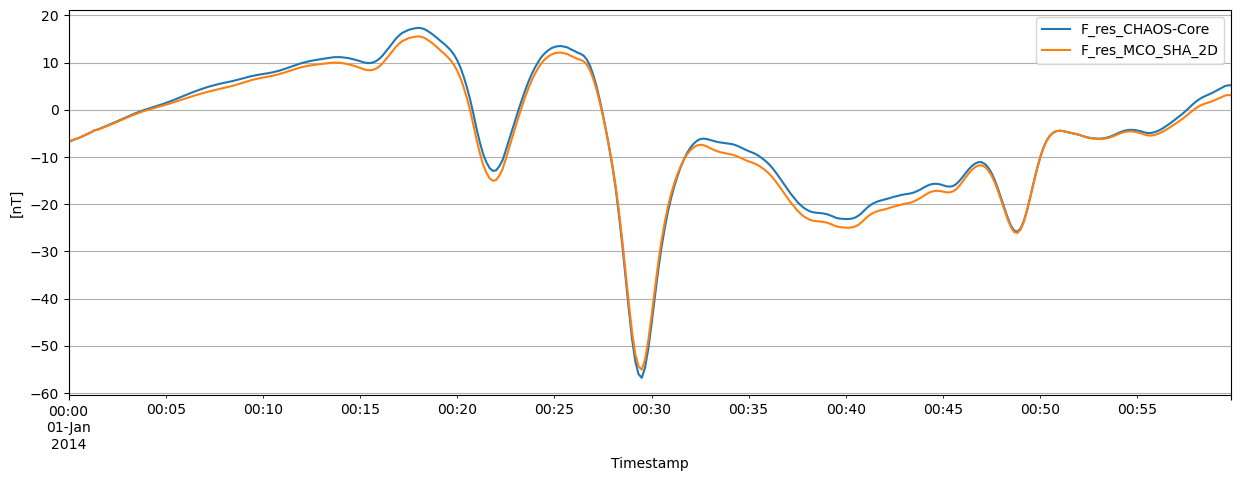

In [11]:
ax = df.plot(
    y=["F_res_CHAOS-Core", "F_res_MCO_SHA_2D"],
    figsize=(15,5),
    grid=True
)
ax.set_xlabel("Timestamp")
ax.set_ylabel("[nT]");

### ... using matplotlib interface

NB: we are doing `plt.plot(x, y)` with `x` as `df.index` (the time-based index of df), and `y` as `df[".."]`

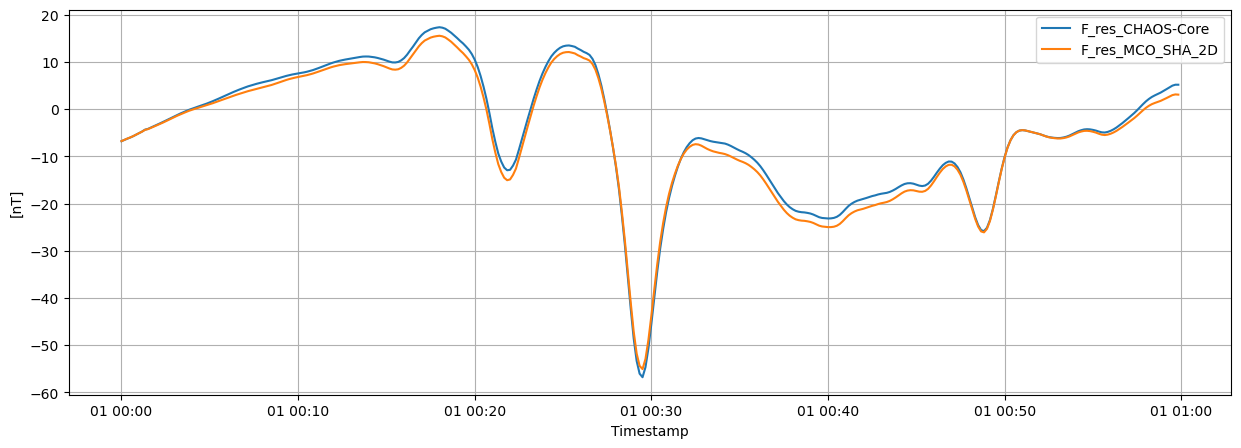

In [12]:
plt.figure(figsize=(15,5))
plt.plot(
    df.index,
    df["F_res_CHAOS-Core"],
    label="F_res_CHAOS-Core"
)
plt.plot(
    df.index,
    df["F_res_MCO_SHA_2D"],
    label="F_res_MCO_SHA_2D"
)
plt.xlabel("Timestamp")
plt.ylabel("[nT]")
plt.grid()
plt.legend();

### ... using matplotlib interface (Object Oriented style)

This is the recommended route for making more complicated figures

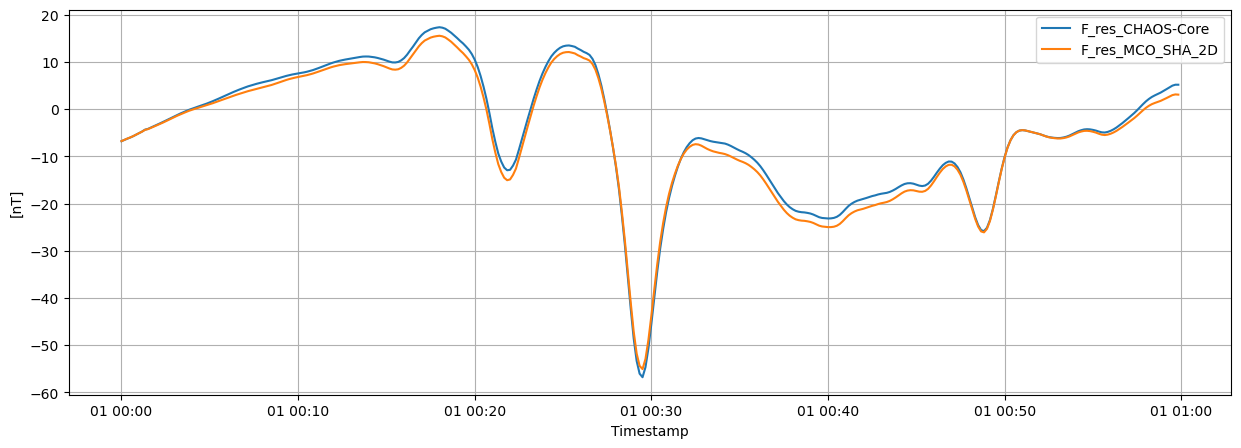

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(
    df.index,
    df["F_res_CHAOS-Core"],
    label="F_res_CHAOS-Core"
)
ax.plot(
    df.index,
    df["F_res_MCO_SHA_2D"],
    label="F_res_MCO_SHA_2D"
)
ax.set_xlabel("Timestamp")
ax.set_ylabel("[nT]")
ax.grid()
ax.legend();

## Plot the vector components

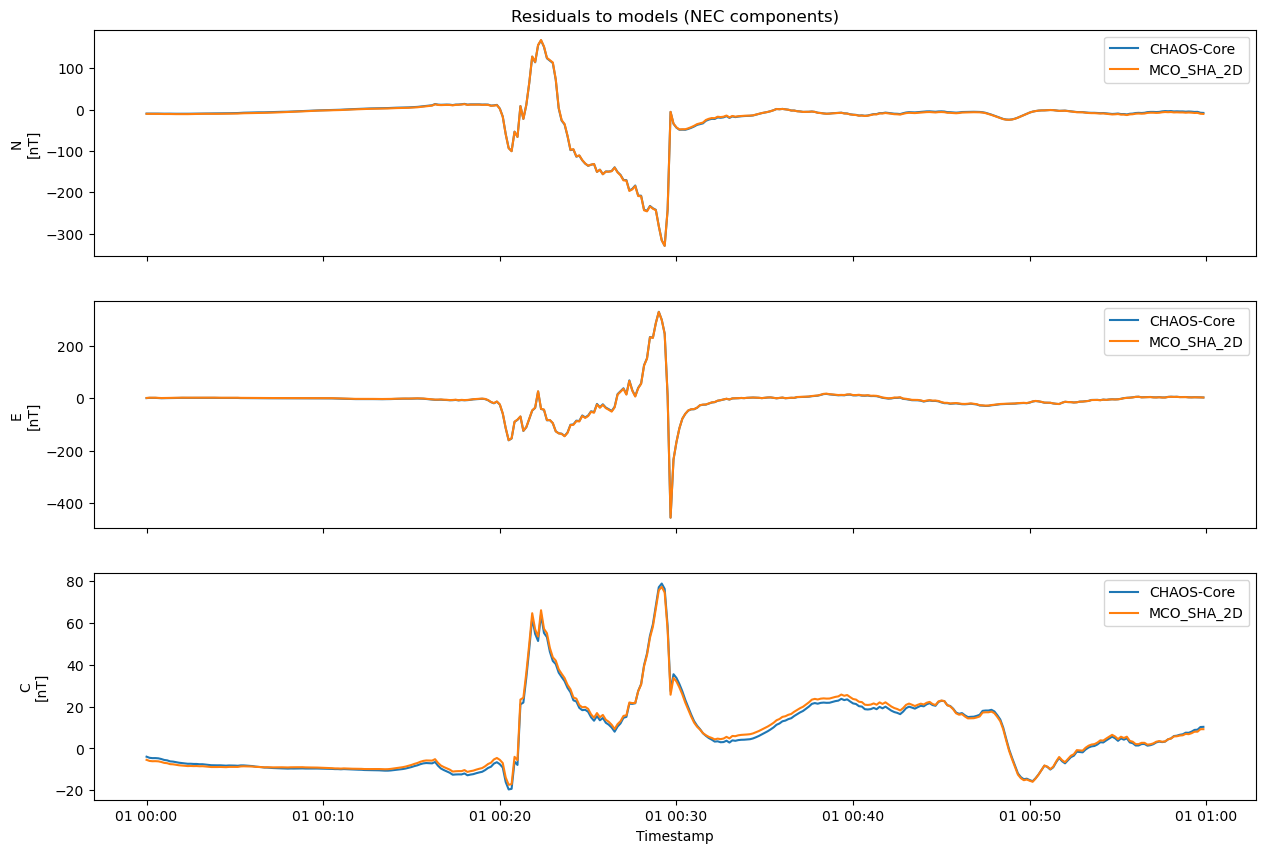

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10), sharex=True)
for component, ax in zip("NEC", axes):
    for model_name in ("CHAOS-Core", "MCO_SHA_2D"):
        ax.plot(
            df.index,
            df[f"B_NEC_res_{model_name}_{component}"],
            label=model_name
        )
    ax.set_ylabel(f"{component}\n[nT]")
    ax.legend()
axes[0].set_title("Residuals to models (NEC components)")
axes[2].set_xlabel("Timestamp");

## Similar plotting, using the data via xarray instead

xarray provides a more sophisticated data structure that is more suitable for the complex vector data we are accessing, together with nice stuff like unit and other metadata support. Unfortunately due to the extra complexity, this can make it difficult to use right away.

In [15]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:               (Timestamp: 360, NEC: 3)
Coordinates:
  * Timestamp             (Timestamp) datetime64[ns] 2014-01-01 ... 2014-01-0...
  * NEC                   (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft            (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Latitude              (Timestamp) float64 -1.229 -1.863 ... 48.14 48.77
    F_res_MCO_SHA_2D      (Timestamp) float64 -6.773 -6.49 ... 3.122 3.077
    B_NEC_res_MCO_SHA_2D  (Timestamp, NEC) float64 -10.09 1.368 ... 3.074 9.198
    B_NEC_res_CHAOS-Core  (Timestamp, NEC) float64 -9.47 0.8401 ... 3.217 10.31
    F_res_CHAOS-Core      (Timestamp) float64 -6.789 -6.51 -6.247 ... 5.18 5.179
    Longitude             (Timestamp) float64 -14.12 -14.13 ... 153.6 153.6
    Radius                (Timestamp) float64 6.878e+06 6.878e+06 ... 6.868e+06
Attributes:
    Sources:         ['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_060...
    MagneticModels:  ["CHAOS-Core = 'CHAOS-Core'(max_degree=20,min_degree=1)"...
    AppliedFilters:  []

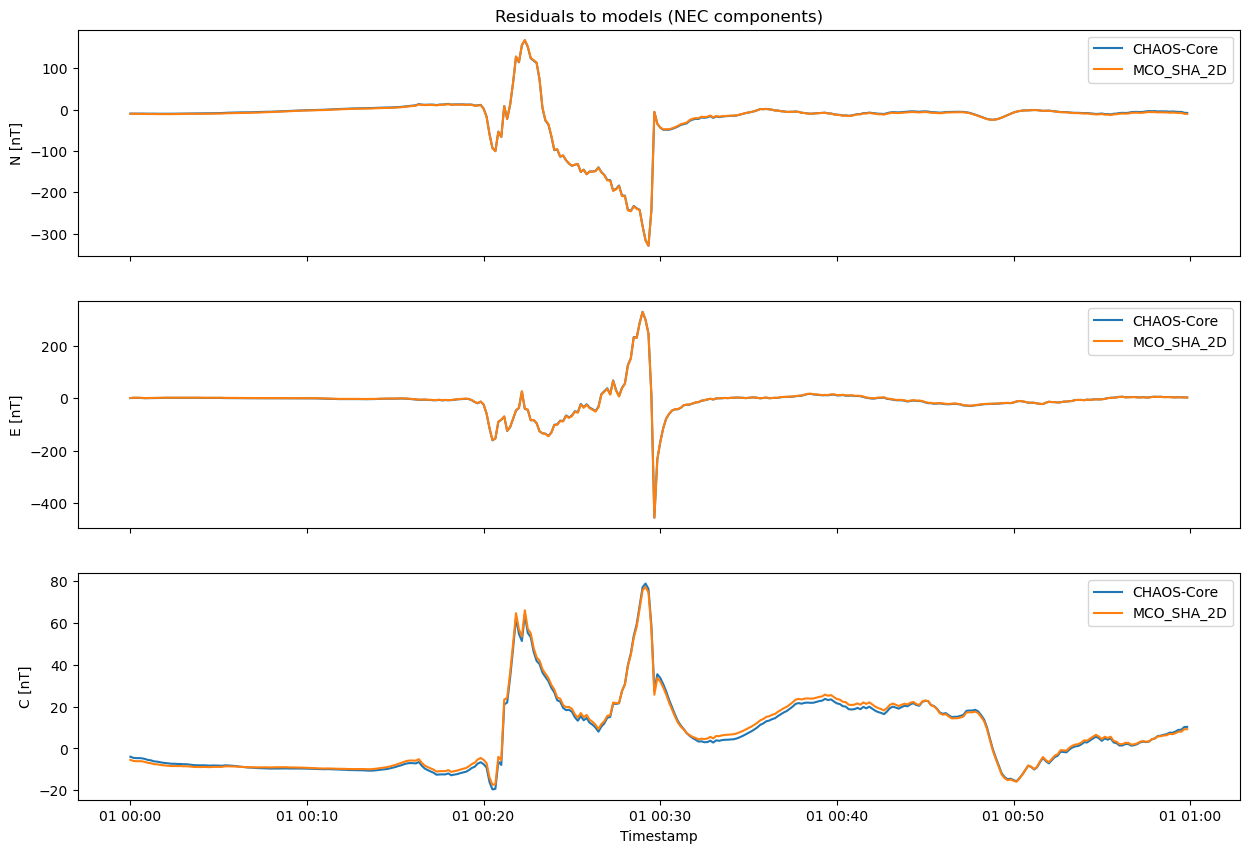

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10), sharex=True)
for i, ax in enumerate(axes):
    for model_name in ("CHAOS-Core", "MCO_SHA_2D"):
        ax.plot(
            ds["Timestamp"],
            ds[f"B_NEC_res_{model_name}"][:, i],
            label=model_name
        )
    ax.set_ylabel("NEC"[i] + " [nT]")
    ax.legend()
axes[0].set_title("Residuals to models (NEC components)")
axes[2].set_xlabel("Timestamp");

Note that xarray also allows convenient direct plotting like:

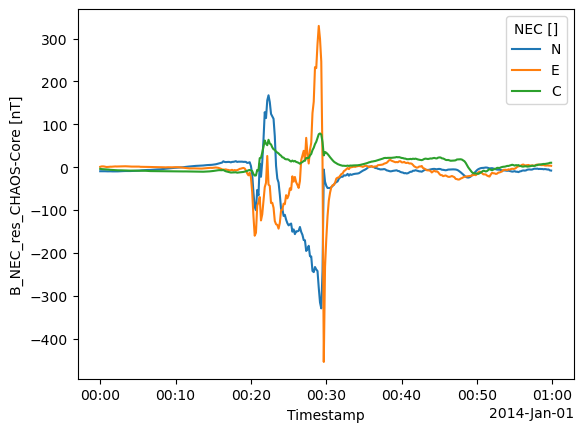

In [17]:
ds["B_NEC_res_CHAOS-Core"].plot.line(x="Timestamp");

## Access multiple MAG datasets simultaneously

It is possible to fetch data from multiple collections simultaneously. Here we fetch the measurements from Swarm Alpha and Bravo. In the returned data, you can differentiate between them using the "Spacecraft" column.

In [18]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B", "SW_OPER_MAGC_LR_1B")
request.set_products(
    measurements=["F", "B_NEC"],
    models=["CHAOS-Core",],
    residuals=True,
    sampling_step="PT10S"
)
data = request.get_between(
    start_time = dt.datetime(2014,1,1, 0),
    end_time = dt.datetime(2014,1,1, 1)
)
df = data.as_dataframe(expand=True)
df.head()

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.072MB)

Spacecraft  Latitude  F_res_CHAOS-Core  Longitude  \
Timestamp                                                               
2014-01-01 00:00:00          A -1.228937         -6.789459 -14.116675   
2014-01-01 00:00:10          A -1.862520         -6.509960 -14.131425   
2014-01-01 00:00:20          A -2.496089         -6.247358 -14.146156   
2014-01-01 00:00:30          A -3.129643         -6.004130 -14.160861   
2014-01-01 00:00:40          A -3.763183         -5.717087 -14.175535   

                         Radius  B_NEC_res_CHAOS-Core_N  \
Timestamp                                                 
2014-01-01 00:00:00  6878309.29               -9.470143   
2014-01-01 00:00:10  6878381.24               -9.446517   
2014-01-01 00:00:20  6878452.12               -9.431467   
2014-01-01 00:00:30  6878521.94               -9.418689   
2014-01-01 00:00:40  6878590.68               -9.489404   

                     B_NEC_res_CHAOS-Core_E  B_NEC_res_CHAOS-Core_C  
Timestamp                                                            
2014-01-01 00:00:00                0.840061               -3.930688  
2014-01-01 00:00:10                1.717392               -4.457975  
2014-01-01 00:00:20                1.854374               -4.613399  
2014-01-01 00:00:30                1.648606               -4.596632  
2014-01-01 00:00:40                1.031573               -4.701795

In [19]:
df[df["Spacecraft"] == "A"].head()

Spacecraft  Latitude  F_res_CHAOS-Core  Longitude  \
Timestamp                                                               
2014-01-01 00:00:00          A -1.228937         -6.789459 -14.116675   
2014-01-01 00:00:10          A -1.862520         -6.509960 -14.131425   
2014-01-01 00:00:20          A -2.496089         -6.247358 -14.146156   
2014-01-01 00:00:30          A -3.129643         -6.004130 -14.160861   
2014-01-01 00:00:40          A -3.763183         -5.717087 -14.175535   

                         Radius  B_NEC_res_CHAOS-Core_N  \
Timestamp                                                 
2014-01-01 00:00:00  6878309.29               -9.470143   
2014-01-01 00:00:10  6878381.24               -9.446517   
2014-01-01 00:00:20  6878452.12               -9.431467   
2014-01-01 00:00:30  6878521.94               -9.418689   
2014-01-01 00:00:40  6878590.68               -9.489404   

                     B_NEC_res_CHAOS-Core_E  B_NEC_res_CHAOS-Core_C  
Timestamp                                                            
2014-01-01 00:00:00                0.840061               -3.930688  
2014-01-01 00:00:10                1.717392               -4.457975  
2014-01-01 00:00:20                1.854374               -4.613399  
2014-01-01 00:00:30                1.648606               -4.596632  
2014-01-01 00:00:40                1.031573               -4.701795

In [20]:
df[df["Spacecraft"] == "C"].head()

Spacecraft  Latitude  F_res_CHAOS-Core  Longitude  \
Timestamp                                                               
2014-01-01 00:00:00          C  5.908083        -10.232054 -14.420068   
2014-01-01 00:00:10          C  5.274386         -9.851545 -14.434576   
2014-01-01 00:00:20          C  4.640702         -9.553396 -14.449141   
2014-01-01 00:00:30          C  4.007031         -9.332680 -14.463755   
2014-01-01 00:00:40          C  3.373371         -9.104033 -14.478411   

                         Radius  B_NEC_res_CHAOS-Core_N  \
Timestamp                                                 
2014-01-01 00:00:00  6877665.96              -10.194582   
2014-01-01 00:00:10  6877747.64               -9.954569   
2014-01-01 00:00:20  6877828.37               -9.851813   
2014-01-01 00:00:30  6877908.13               -9.962902   
2014-01-01 00:00:40  6877986.91              -10.056710   

                     B_NEC_res_CHAOS-Core_E  B_NEC_res_CHAOS-Core_C  
Timestamp                                                            
2014-01-01 00:00:00                1.987937               -0.162476  
2014-01-01 00:00:10                2.075120               -0.662316  
2014-01-01 00:00:20                1.981866               -1.123274  
2014-01-01 00:00:30                1.582531               -1.740701  
2014-01-01 00:00:40                1.075545               -2.170903

### ... or using xarray

In [21]:
ds = data.as_xarray()
ds.where(ds["Spacecraft"] == "A", drop=True)

<xarray.Dataset>
Dimensions:               (Timestamp: 360, NEC: 3)
Coordinates:
  * Timestamp             (Timestamp) datetime64[ns] 2014-01-01 ... 2014-01-0...
  * NEC                   (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft            (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Latitude              (Timestamp) float64 -1.229 -1.863 ... 48.14 48.77
    B_NEC_res_CHAOS-Core  (Timestamp, NEC) float64 -9.47 0.8401 ... 3.217 10.31
    F_res_CHAOS-Core      (Timestamp) float64 -6.789 -6.51 -6.247 ... 5.18 5.179
    Longitude             (Timestamp) float64 -14.12 -14.13 ... 153.6 153.6
    Radius                (Timestamp) float64 6.878e+06 6.878e+06 ... 6.868e+06
Attributes:
    Sources:         ['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_060...
    MagneticModels:  ["CHAOS-Core = 'CHAOS-Core'(max_degree=20,min_degree=1)"]
    AppliedFilters:  []